In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [48]:
data = pd.read_csv('train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [49]:
num = data.select_dtypes(include = 'number')
cat = data.select_dtypes(exclude = 'number')

print(f'Numerical Variables\n')
display(num.head())

print(f'Categorical Variables\n')
display(cat.head())

Numerical Variables



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Categorical Variables



""
0
1
2
3
4


In [8]:
data.price_range.unique()

array([1, 2, 3, 0])

In [9]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

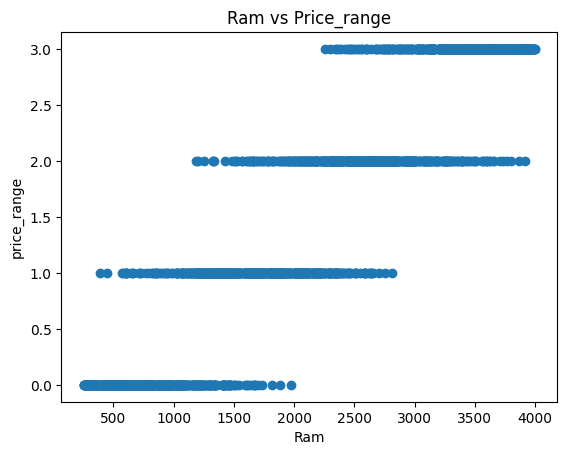

In [11]:
plt.scatter(x=data['ram'], y=data['price_range'])

plt.title('Ram vs Price_range')

plt.xlabel('Ram')

plt.ylabel('price_range')
plt.show()

<Axes: xlabel='ram', ylabel='price_range'>

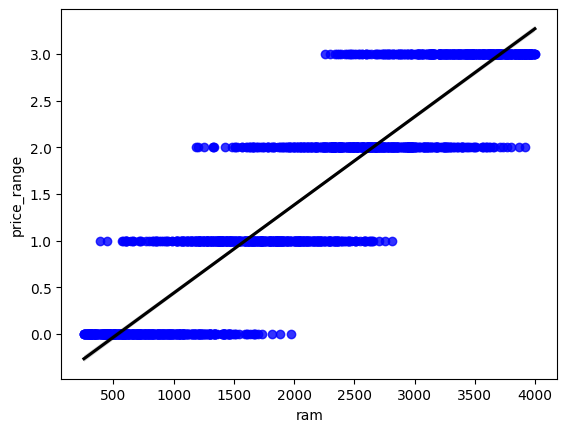

In [15]:
#plot Ram vs Price range using seaborn

sns.regplot(x='ram', y='price_range', data=data, scatter_kws={"color": "blue"}, line_kws={"color":"black"})

[Text(0, 0, '1.5')]

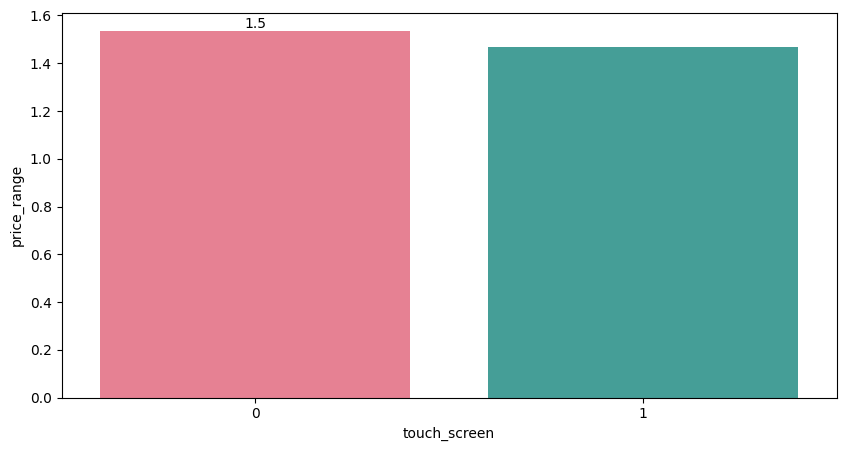

In [46]:
plt.figure(figsize = (10, 5))
fig = sns.barplot(x = data.touch_screen, y = data['price_range'], ci = 0, palette = 'husl')
fig.bar_label(fig.containers[0], fmt = '%.1f')

In [22]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

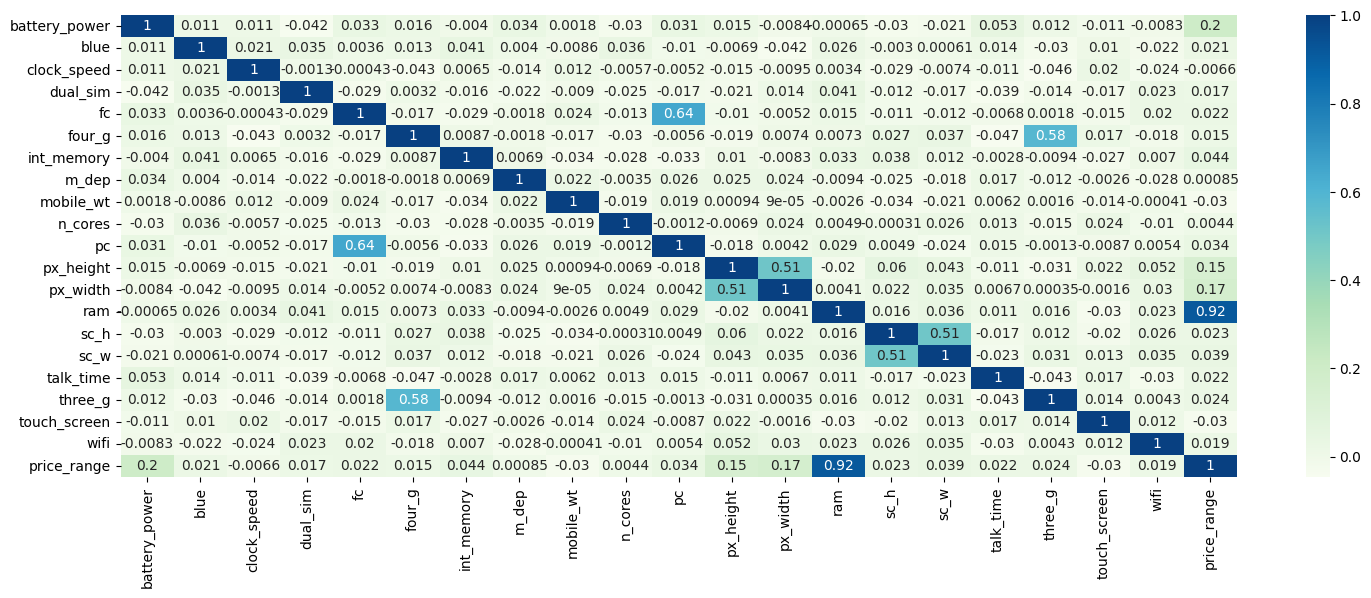

In [27]:
# Using a correlation matrix, visualize the relationship of all numerical values

plt.figure(figsize = (18, 6))
sns.heatmap(num.corr(), annot = True, cmap = 'GnBu')

<b><h3>Feature Selection

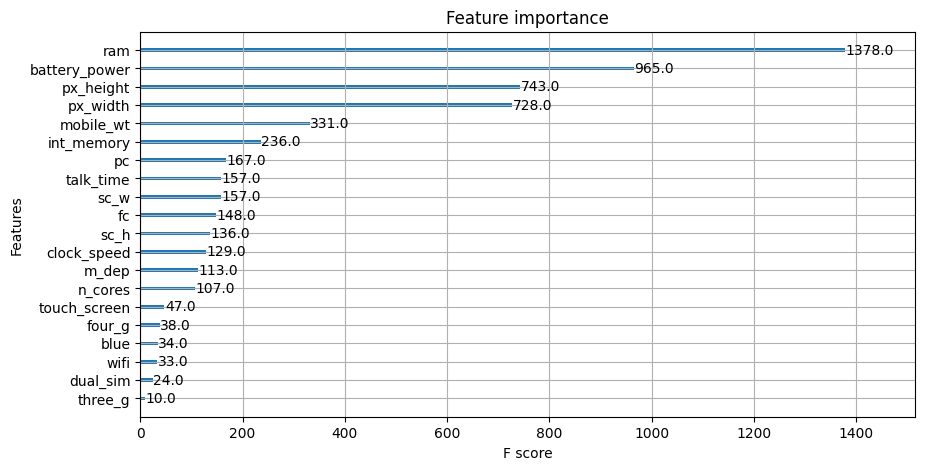

In [10]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = data.drop('price_range', axis = 1)
y = data.price_range

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [11]:
sel_cols = ['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt', 'int_memory', 'pc', 'price_range']
sel_data = data[sel_cols]
sel_data

,ram,battery_power,px_height,px_width,mobile_wt,int_memory,pc,price_range
0,2549,842,20,756,188,7,2,1
1,2631,1021,905,1988,136,53,6,2
2,2603,563,1263,1716,145,41,6,2
3,2769,615,1216,1786,131,10,9,2
4,1411,1821,1208,1212,141,44,14,1
...,...,...,...,...,...,...,...,...
1995,668,794,1222,1890,106,2,14,0
1996,2032,1965,915,1965,187,39,3,2
1997,3057,1911,868,1632,108,36,3,3
1998,869,1512,336,670,145,46,5,0


In [12]:
import warnings
warnings.filterwarnings('ignore')
sel_data.dropna(inplace = True)
sel_data.shape

(2000, 8)

<Axes: xlabel='price_range', ylabel='count'>

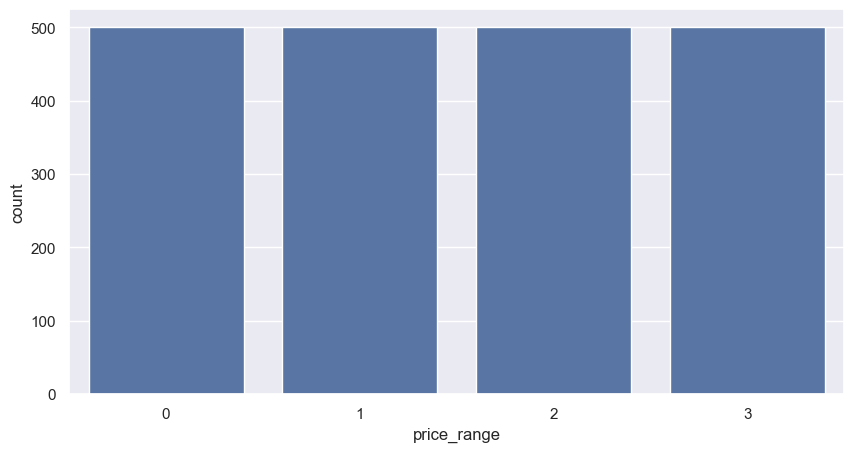

In [13]:
sns.set(style = 'darkgrid')
sns.countplot(x = sel_data.price_range)

<Axes: xlabel='price_range', ylabel='count'>

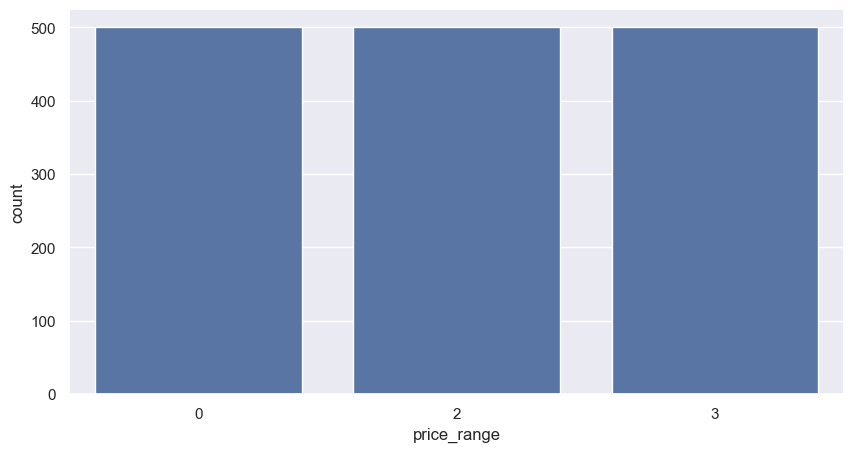

In [14]:
#sel_data = sel_data.loc[sel_data['price_range'] != 1]
#sns.countplot(x = sel_data.price_range)

In [14]:
# Split Into Train and Test
x = sel_data.drop('price_range', axis = 1)
y = sel_data.price_range

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier()

rf_model.fit(xtrain, ytrain)
cross_val = print(classification_report(rf_model.predict(xtrain), ytrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [17]:
print(classification_report(rf_model.predict(xtest), ytest))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       103
           1       0.83      0.87      0.85        95
           2       0.84      0.81      0.82       104
           3       0.92      0.94      0.93        98

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [19]:
# serialise transformers and model
import joblib


joblib.dump(rf_model,'phone_models.pkl') # to save your model to a file

['phone_models.pkl']

In [20]:
import joblib
imported_model = joblib.load('phone_models.pkl')
imported_model

RandomForestClassifier()

In [21]:
new_phone = data.sample(5).drop('price_range', axis = 1)
new_phone

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1392,1686,1,0.5,1,4,0,28,0.8,182,5,8,599,1073,780,11,10,5,0,0,0
1391,794,0,2.5,1,15,0,14,0.6,197,3,19,312,1376,2171,19,8,18,0,0,1
19,682,1,0.5,0,4,0,19,1.0,121,4,11,902,1064,2337,11,1,18,0,1,1
581,1512,1,0.5,0,8,1,18,0.1,88,3,17,1079,1897,3607,12,10,6,1,1,1
382,1809,1,1.7,0,3,1,59,0.1,174,3,4,639,721,2324,10,6,16,1,0,1


In [22]:
new_phone = new_phone[sel_cols[:-1]]
new_phone.dropna(inplace = True)
new_phone

,ram,battery_power,px_height,px_width,mobile_wt,int_memory,pc
1392,780,1686,599,1073,182,28,8
1391,2171,794,312,1376,197,14,19
19,2337,682,902,1064,121,19,11
581,3607,1512,1079,1897,88,18,17
382,2324,1809,639,721,174,59,4


In [23]:
imported_model.predict(new_phone)

array([0, 1, 1, 3, 2])

In [24]:
# batch predict and save the predicted patients into a new column called predicted patients
new_phone['predicted_phone'] = imported_model.predict(new_phone)
new_phone

,ram,battery_power,px_height,px_width,mobile_wt,int_memory,pc,predicted_phone
1392,780,1686,599,1073,182,28,8,0
1391,2171,794,312,1376,197,14,19,1
19,2337,682,902,1064,121,19,11,1
581,3607,1512,1079,1897,88,18,17,3
382,2324,1809,639,721,174,59,4,2
